In [16]:
from ktest.rv_gen import generate_standard_gaussian_2D,shift_2d_data,rescale_2d_data
from ktest.tester import Ktest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ktest.utils_matplotlib import scatter_2d

In [28]:
ss= [3007,1002,301]
shifts = [[0,1],[1,0],[1,1]]

Y2={}
X2=[]

conditions = 3 # treatments
patients = 2 # patients 
r=20

for i in range(conditions):
    for j in range(patients):
        nij = 300
        sij = ss[i]+j

        sx,sy = [shift + j for shift in shifts[i]]
    
        yij = generate_standard_gaussian_2D(n=nij,seed=sij)
        if i == 0:
            yij = rescale_2d_data(yij,1,r)
            yij = shift_2d_data(yij,0,0)
        if i == 1:
            yij = rescale_2d_data(yij,r,1)

        if i == 2:
            yij = rescale_2d_data(yij,r,1)
            yij = shift_2d_data(yij,0,7)

            
        yij = shift_2d_data(yij,sx,sy)
        Y2[(i,j)] = yij
        X2+=[[f'c{i+1}',f'p{j+1}']]*nij


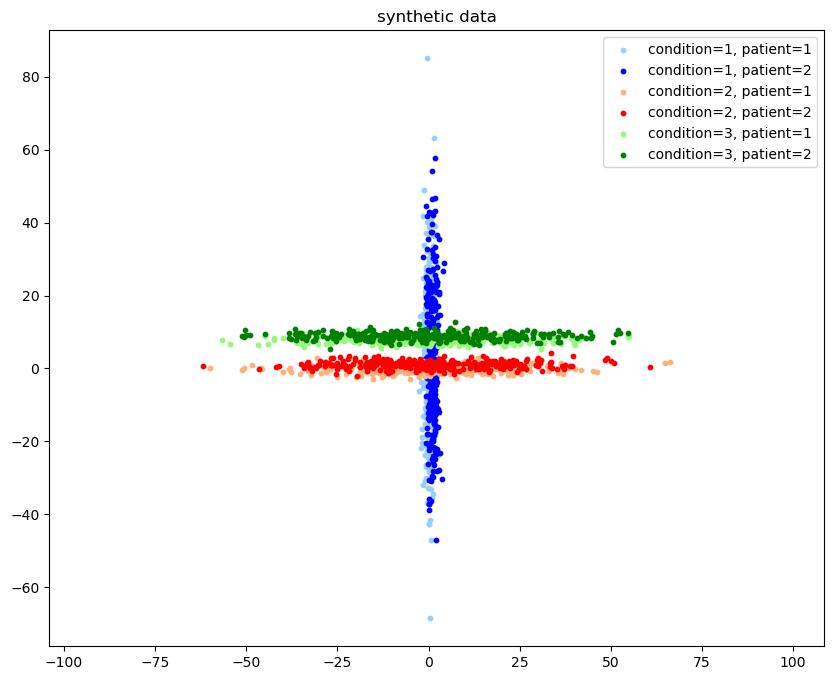

In [29]:
C2 = {0:['xkcd:light blue','xkcd:peach','xkcd:light green'],
          1:['blue','red','green']}


fig,ax =plt.subplots(figsize=(10,8))
ax.set_title('synthetic data')

# fig,ax =plt.subplots()
for i in range(conditions):
    for j in range(patients):

        yij = Y2[(i,j)]
        cij = C2[j][i]
        scatter_2d(ax,yij,cij,label=f'condition={i+1}, patient={j+1}')
ax.legend()

In [30]:
Y2c = np.concatenate(list(Y2.values()))
Y2c
dfy2 = pd.DataFrame(Y2c)
dfx2 = pd.DataFrame(X2,columns=['condition','patient'])
dfy2
dfx2

,condition,patient
0,c1,p1
1,c1,p1
2,c1,p1
3,c1,p1
4,c1,p1
...,...,...
1795,c3,p2
1796,c3,p2
1797,c3,p2
1798,c3,p2


In [31]:
dfy2.to_csv('data.csv')
dfx2.to_csv('metadata.csv')

In [23]:
data = pd.read_csv('data.csv',index_col=0)
metadata = pd.read_csv('metadata.csv',index_col=0)
kt = Ktest(data,metadata,condition='condition',samples=[1,2])
